## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
#Importing the train and test data set
df=pd.read_csv('Train.csv.csv')
df_test=pd.read_csv('Test.csv.csv')

<IPython.core.display.Javascript object>

## Data Overview

In [3]:
#Checking the first few rows of the training data set
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


<IPython.core.display.Javascript object>

In [4]:
#Checking the last few rows of the training data set
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


<IPython.core.display.Javascript object>

In [5]:
#Checking the first few rows of the testing data set
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


<IPython.core.display.Javascript object>

In [6]:
#Checking the last few rows of the test data set
df_test.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120,1.635,1.251,4.036,3.291,-2.932,-1.329,1.754,-2.985,1.249,-6.878,3.715,-2.512,-1.395,-2.554,-2.197,4.772,2.403,3.792,0.487,-2.028,1.778,3.668,11.375,-1.977,2.252,-7.319,1.907,-3.734,-0.012,2.120,9.979,0.063,0.217,3.036,2.109,-0.557,1.939,0.513,-2.694,0
4996,-5.172,1.172,1.579,1.220,2.530,-0.669,-2.618,-2.001,0.634,-0.579,-3.671,0.460,3.321,-1.075,-7.113,-4.356,-0.001,3.698,-0.846,-0.222,-3.645,0.736,0.926,3.278,-2.277,4.458,-4.543,-1.348,-1.779,0.352,-0.214,4.424,2.604,-2.152,0.917,2.157,0.467,0.470,2.197,-2.377,0
4997,-1.114,-0.404,-1.765,-5.879,3.572,3.711,-2.483,-0.308,-0.922,-2.999,-0.112,-1.977,-1.623,-0.945,-2.735,-0.813,0.610,8.149,-9.199,-3.872,-0.296,1.468,2.884,2.792,-1.136,1.198,-4.342,-2.869,4.124,4.197,3.471,3.792,7.482,-10.061,-0.387,1.849,1.818,-1.246,-1.261,7.475,0
4998,-1.703,0.615,6.221,-0.104,0.956,-3.279,-1.634,-0.104,1.388,-1.066,-7.970,2.262,3.134,-0.486,-3.498,-4.562,3.136,2.536,-0.792,4.398,-4.073,-0.038,-2.371,-1.542,2.908,3.215,-0.169,-1.541,-4.724,-5.525,1.668,-4.100,-5.949,0.550,-1.574,6.824,2.139,-4.036,3.436,0.579,0
4999,-0.604,0.960,-0.721,8.230,-1.816,-2.276,-2.575,-1.041,4.130,-2.731,-3.292,-1.674,0.465,-1.646,-5.263,-7.988,6.480,0.226,4.963,6.752,-6.306,3.271,1.897,3.271,-0.637,-0.925,-6.759,2.990,-0.814,3.499,-8.435,2.370,-1.062,0.791,4.952,-7.441,-0.070,-0.918,-2.291,-5.363,0


<IPython.core.display.Javascript object>

### Observations:
  - We can see the first few lines of data from both the training and testing data set. 
  - in both, we can observe variables labeled V1 to V40, and then a target variable
  - We can observe some negative values in the variables

- Observations
- Sanity checks

In [7]:
#Checking the shape of the training data
df.shape

(20000, 41)

<IPython.core.display.Javascript object>

Observation: There are 20000 rows and 41 columns in the training data set

In [8]:
#Checking the shape of the testing data
df_test.shape

(5000, 41)

<IPython.core.display.Javascript object>

Observation: There are 5000 rows and 41 columns in the testing data set

In [9]:
#checking the data type in the training dtata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [10]:
#checking the data type in the testing dtata
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

<IPython.core.display.Javascript object>

### Observation: 
- All the variables in both the training and testing data set are floats except the target variable which is an integer

In [11]:
#Checking the statistical information in the training data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

In [12]:
#Checking the statistical information in the testing data
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


<IPython.core.display.Javascript object>

#### Observations
- In both the training and testing data, we can observe that most of the variables have their means and medians very close to each other, indicating a normal distribution
- In both datasets the mean, std and percentiles seem usual.
- There are some negative variables, however we won't treat them since the data is from a wind sensor.

In [13]:
#Checking for duplicates in the training data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [14]:
#Checking for duplicates in the testing data
df_test.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Observations:
- There are no duplicates in both the training and testing data

In [15]:
#Checking the null values in the training data
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation:
- There are 18 null values in both the V1 and V2 variables in the training data. we will treat them later.

In [16]:
#Checking the null values in the testing data
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation:
- There are 5 null values in the V1 column and 6 null values in the V2 variable in the testing data. we will treat them later.

In [17]:
#Creatiing copies of the training and testing data
data=df.copy()
data_test=df_test.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [18]:

#Defining the function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

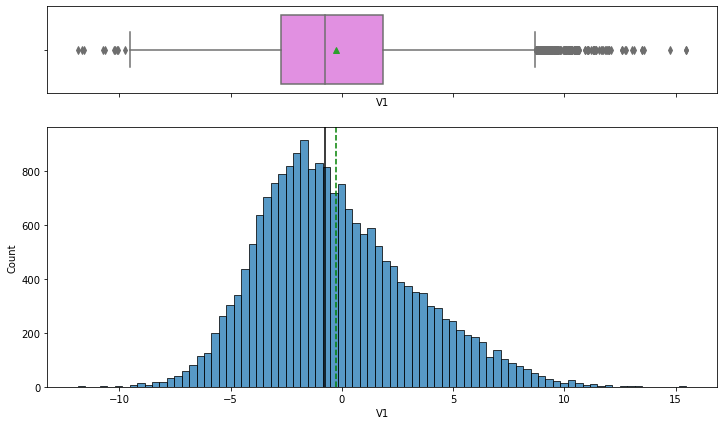

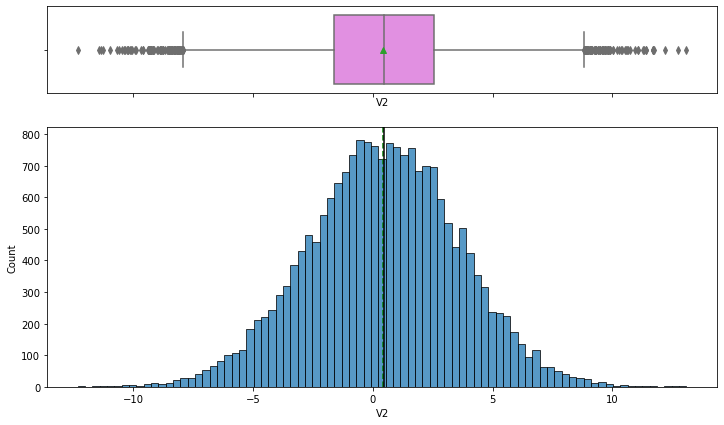

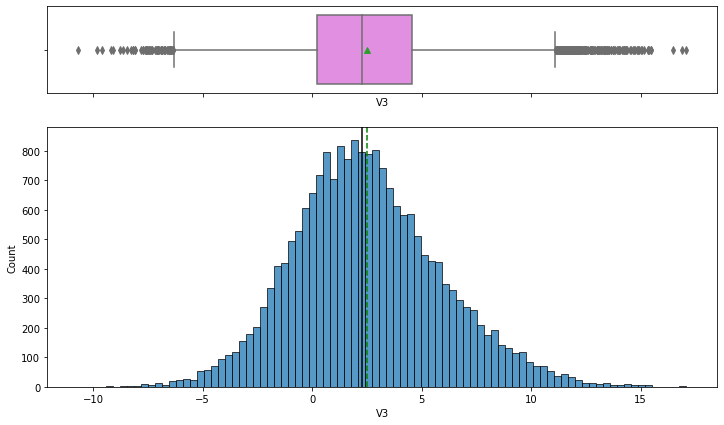

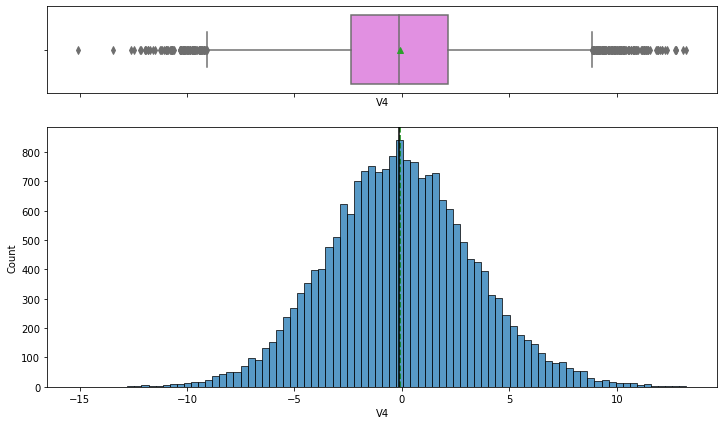

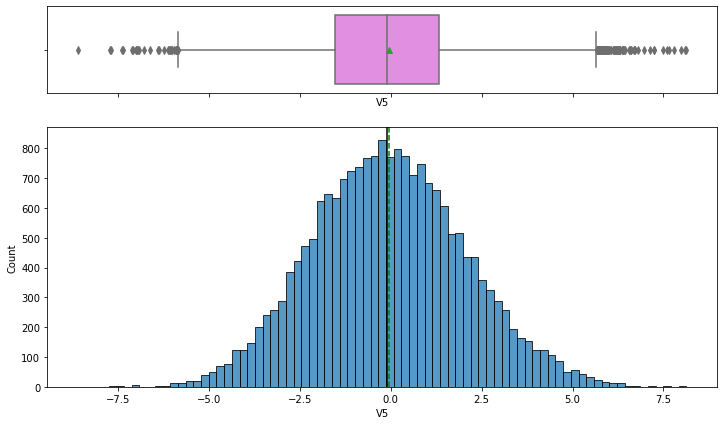

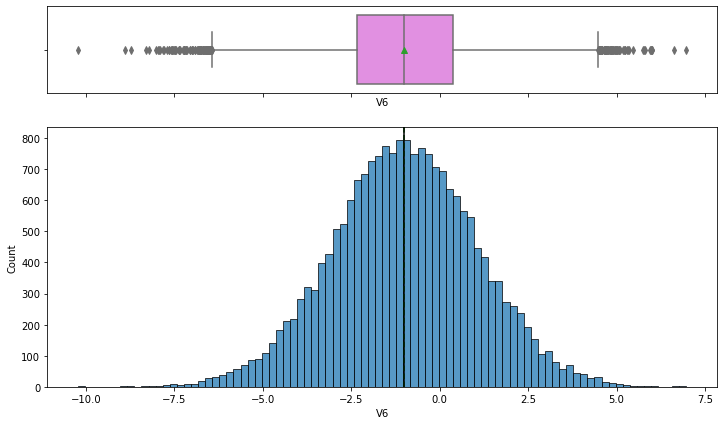

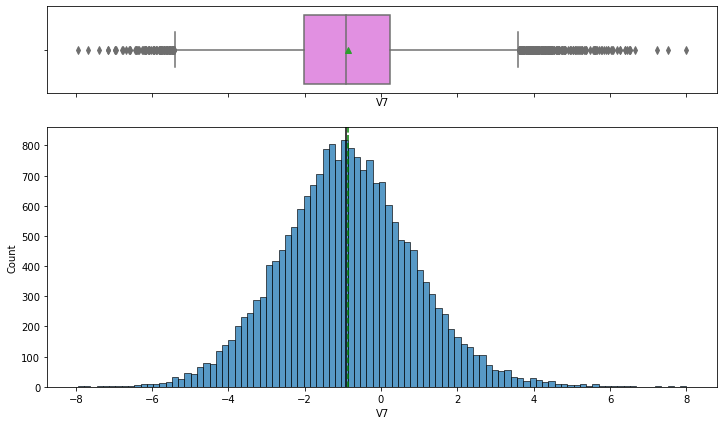

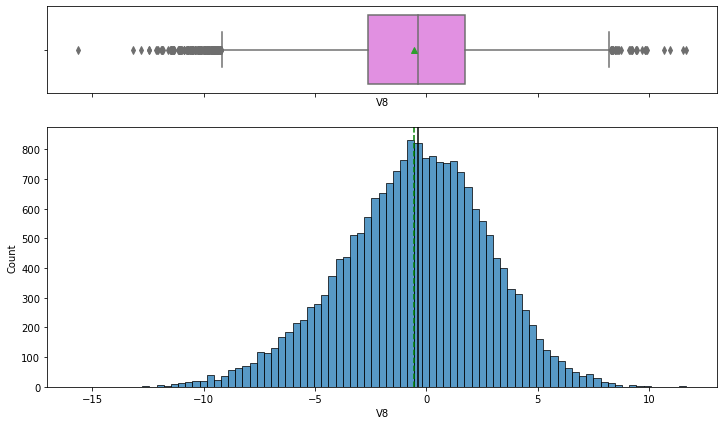

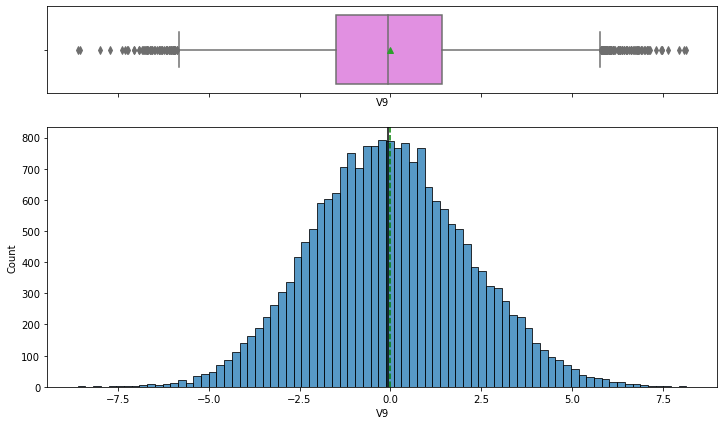

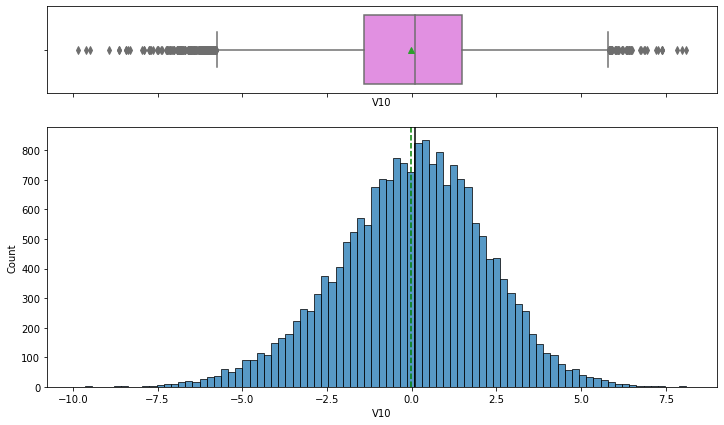

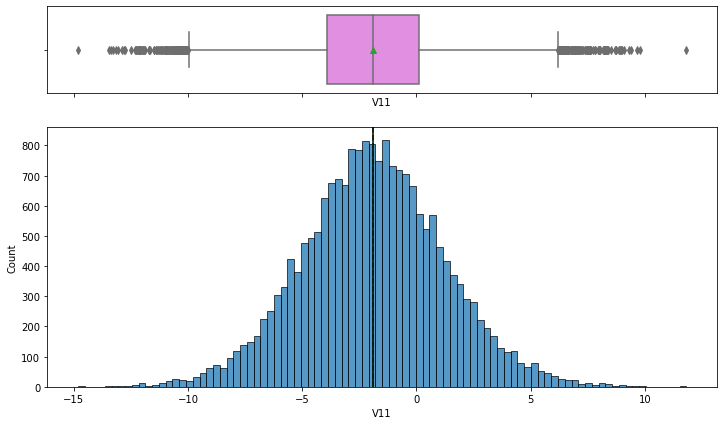

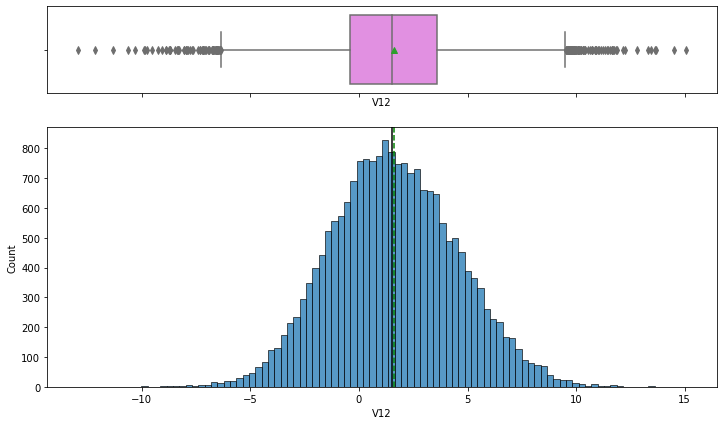

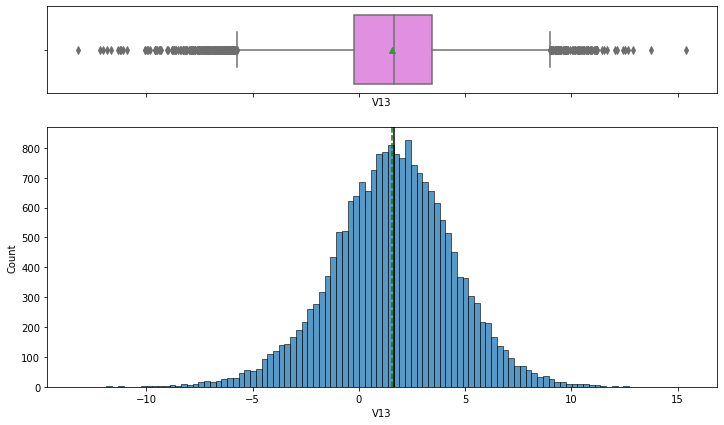

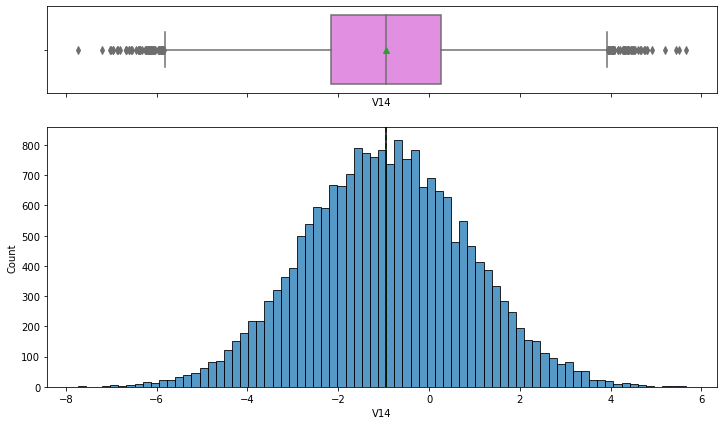

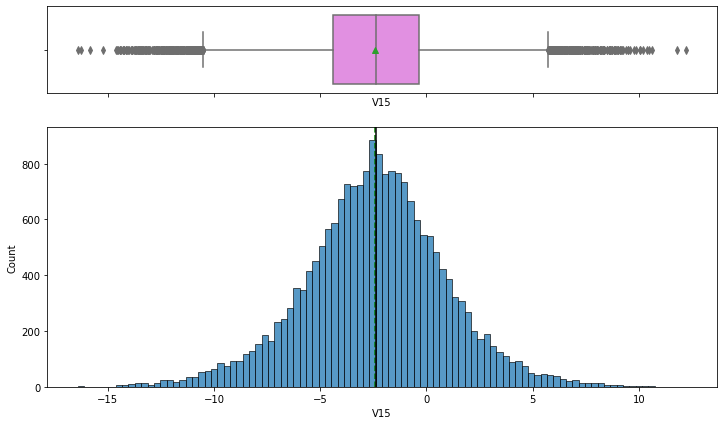

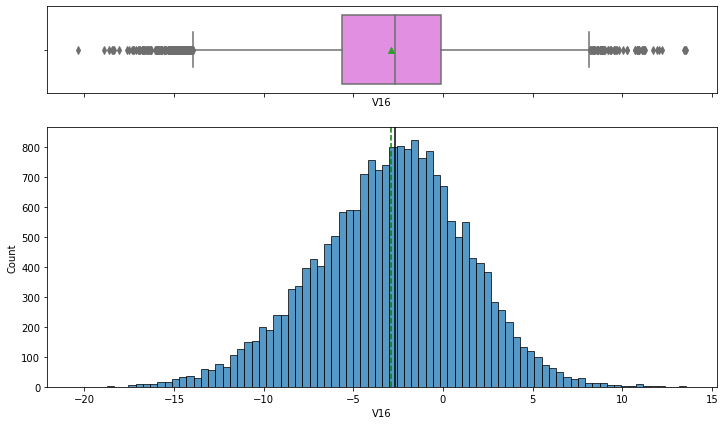

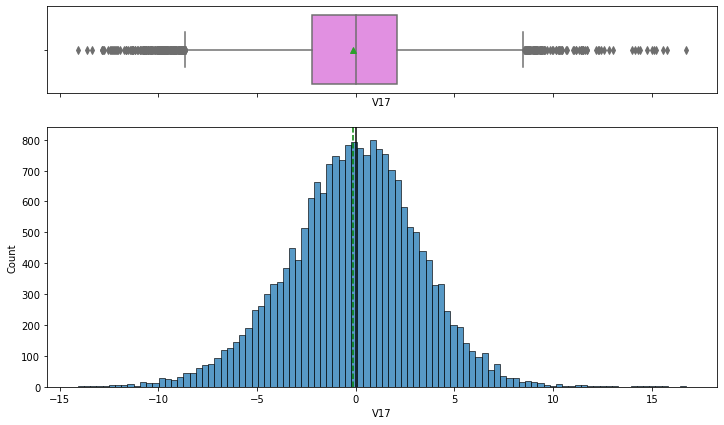

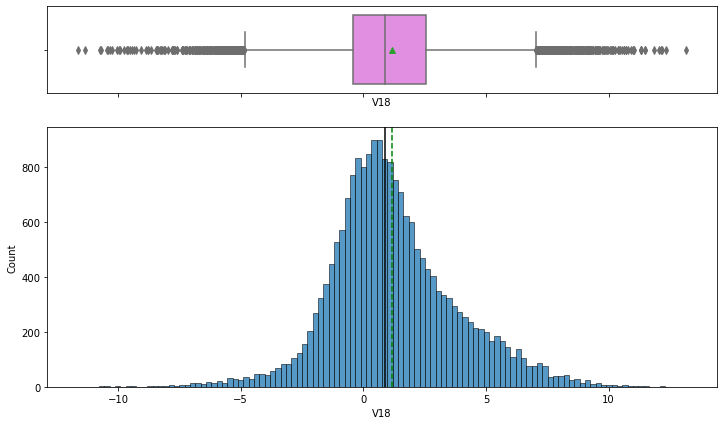

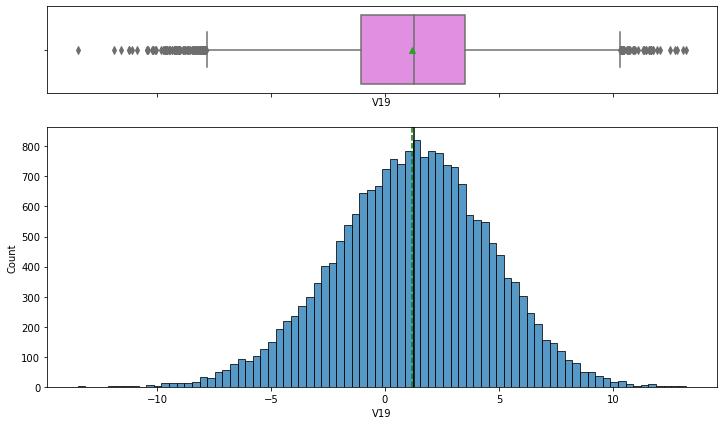

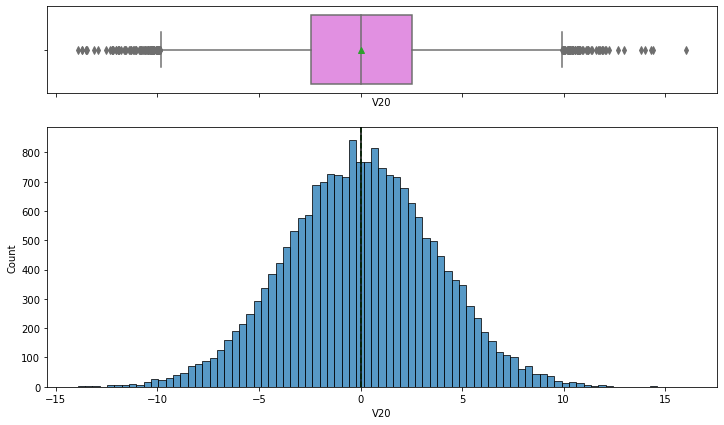

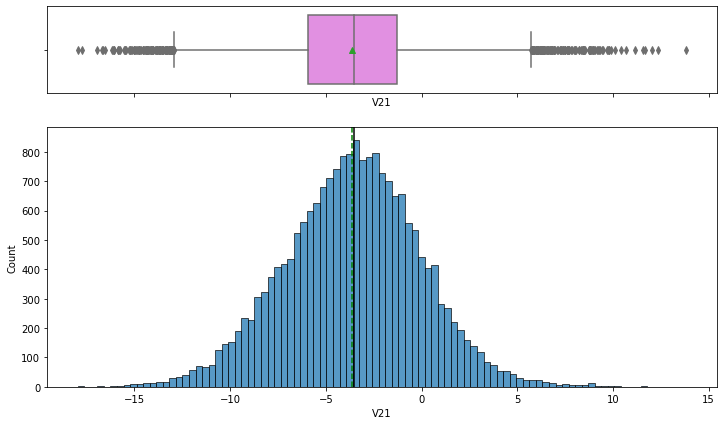

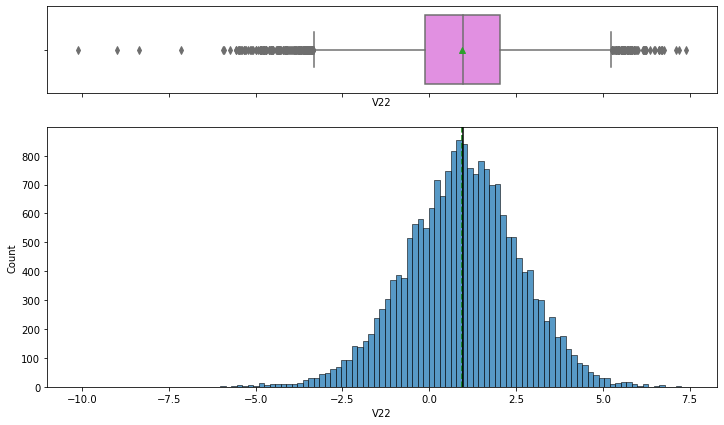

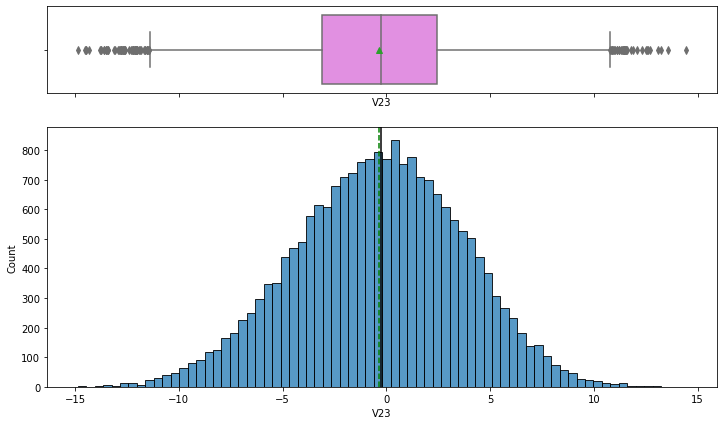

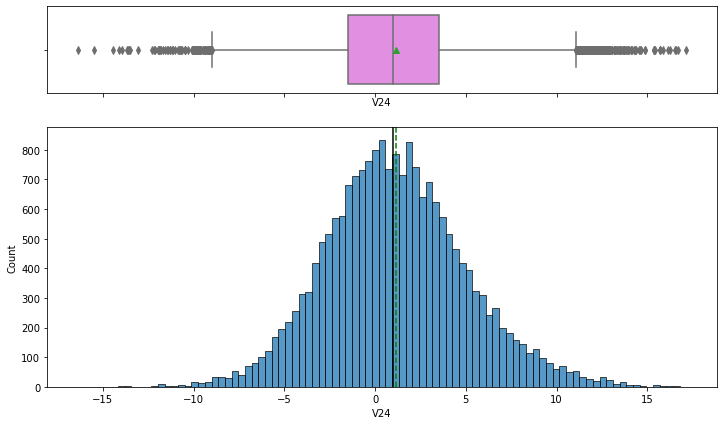

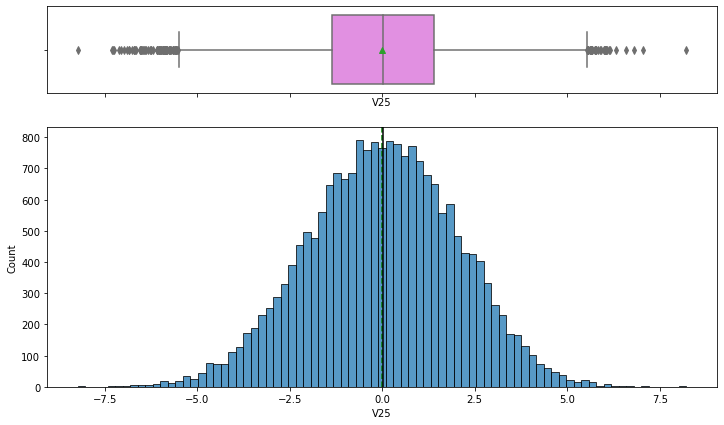

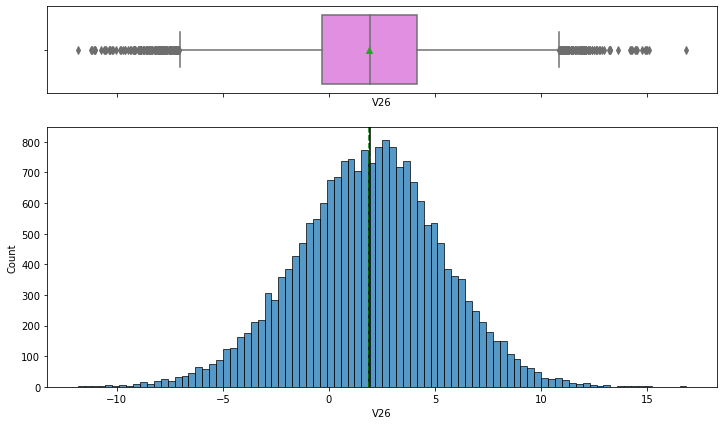

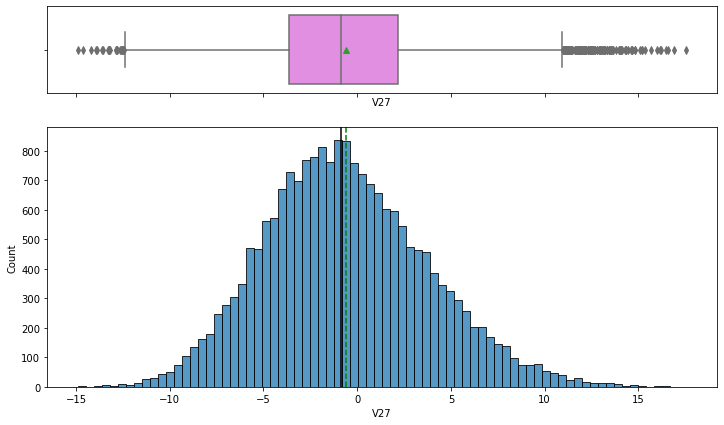

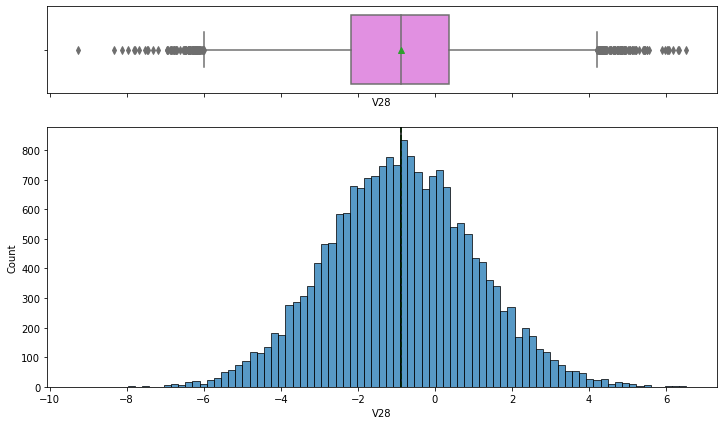

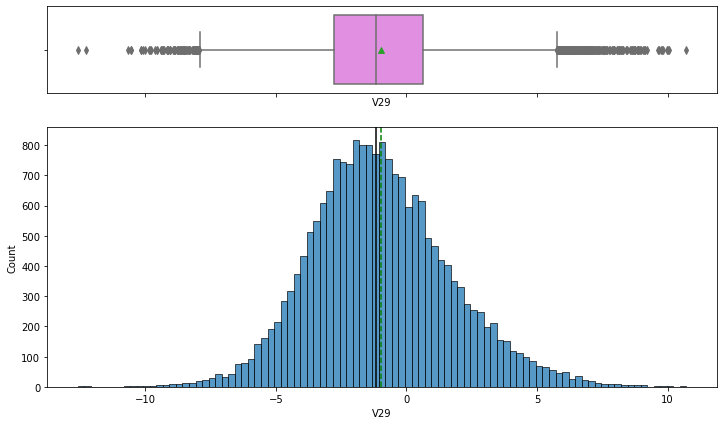

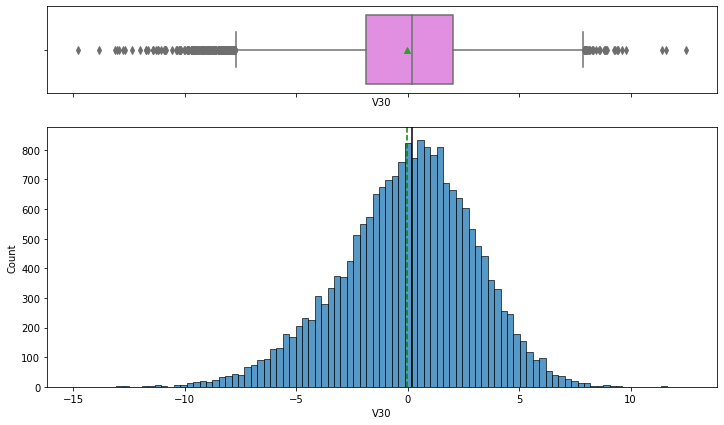

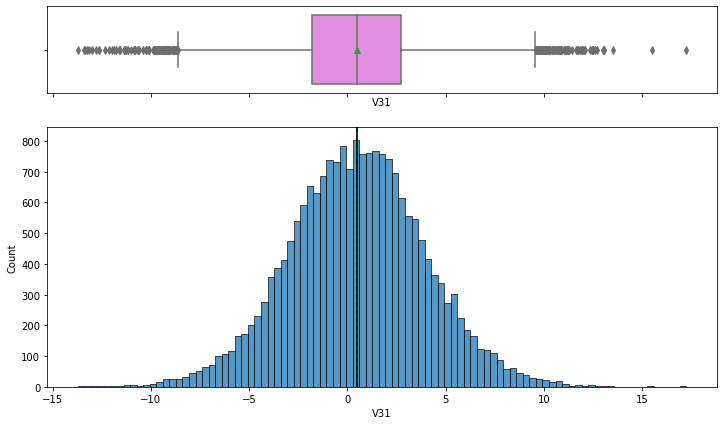

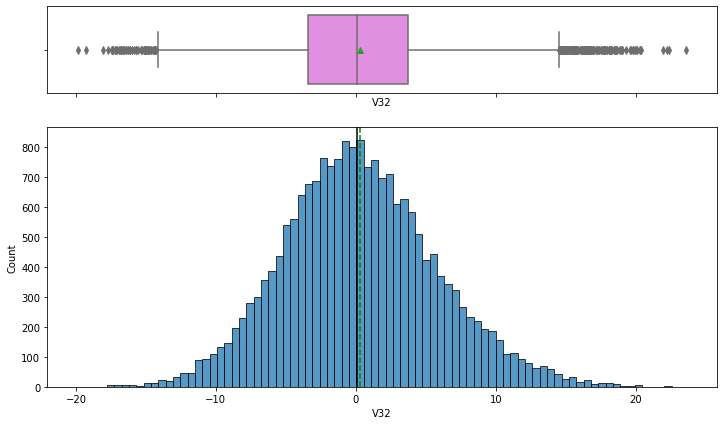

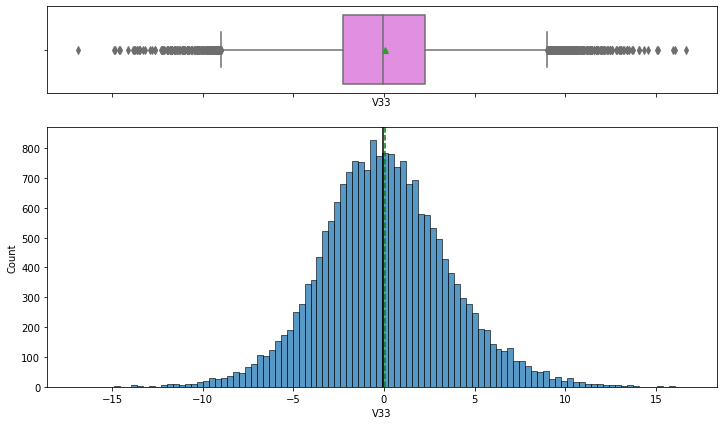

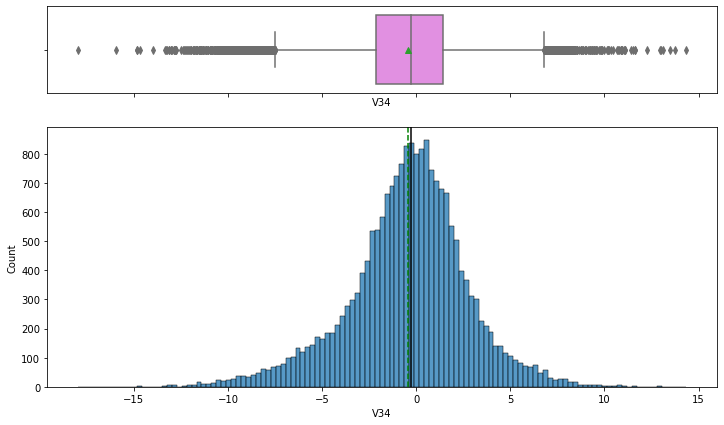

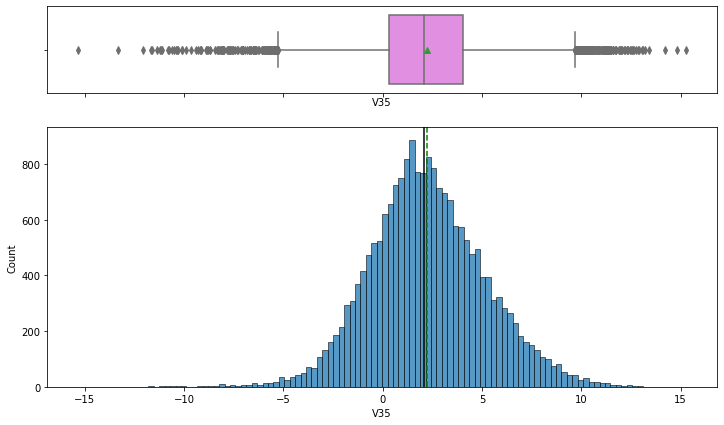

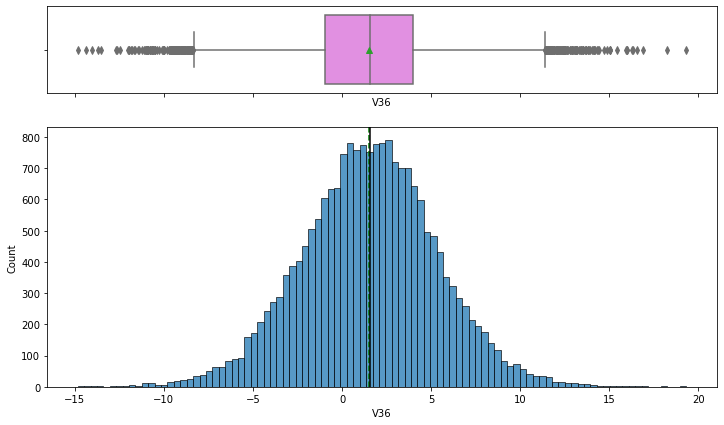

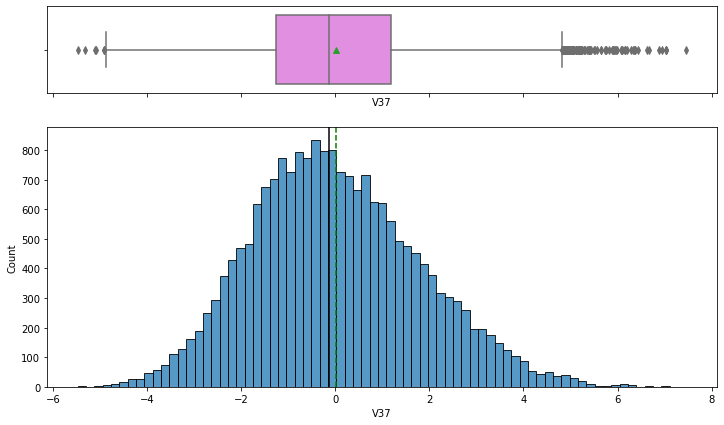

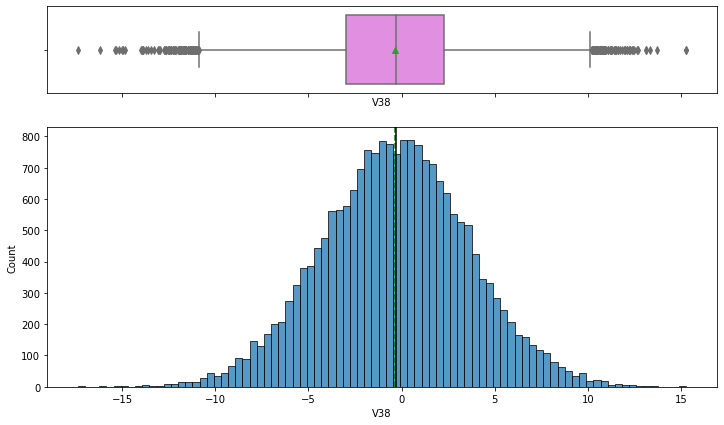

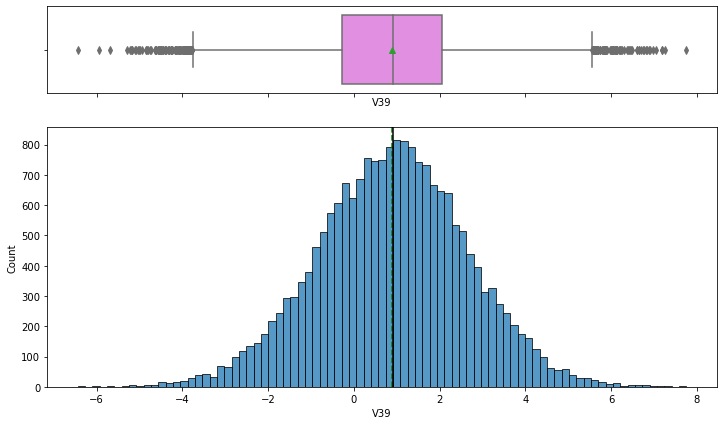

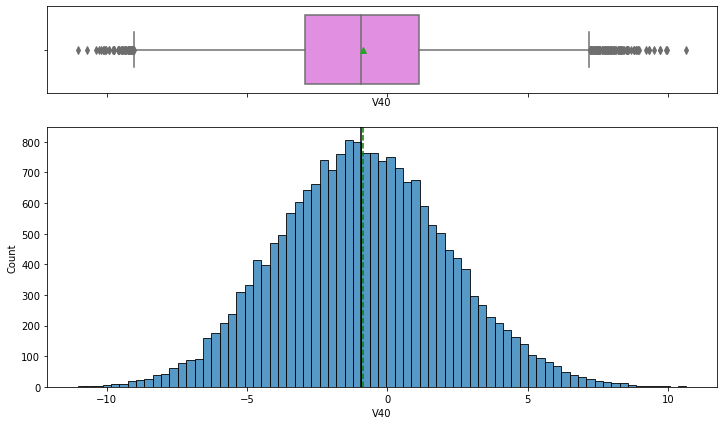

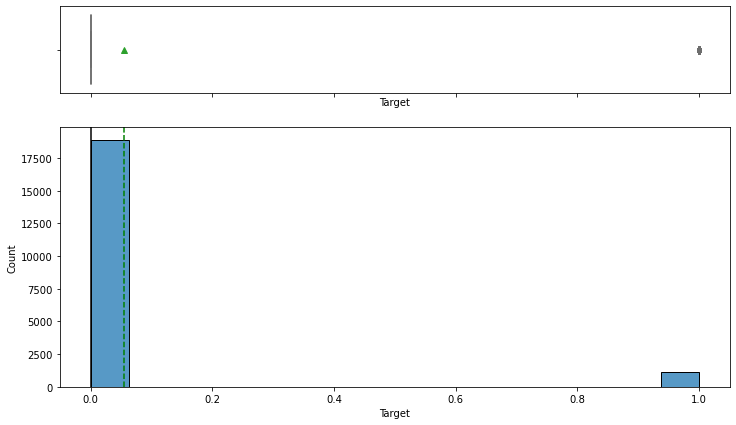

<IPython.core.display.Javascript object>

In [19]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

#### Observation on univariate analysis:
   - We can observe that the variables are majorly normally distributed except v1 with a slight right skew and the target variables
   - We can observe outliers in all box plots as well, but these seem to be very valid values and it makes sense given that our data is collected from sensors

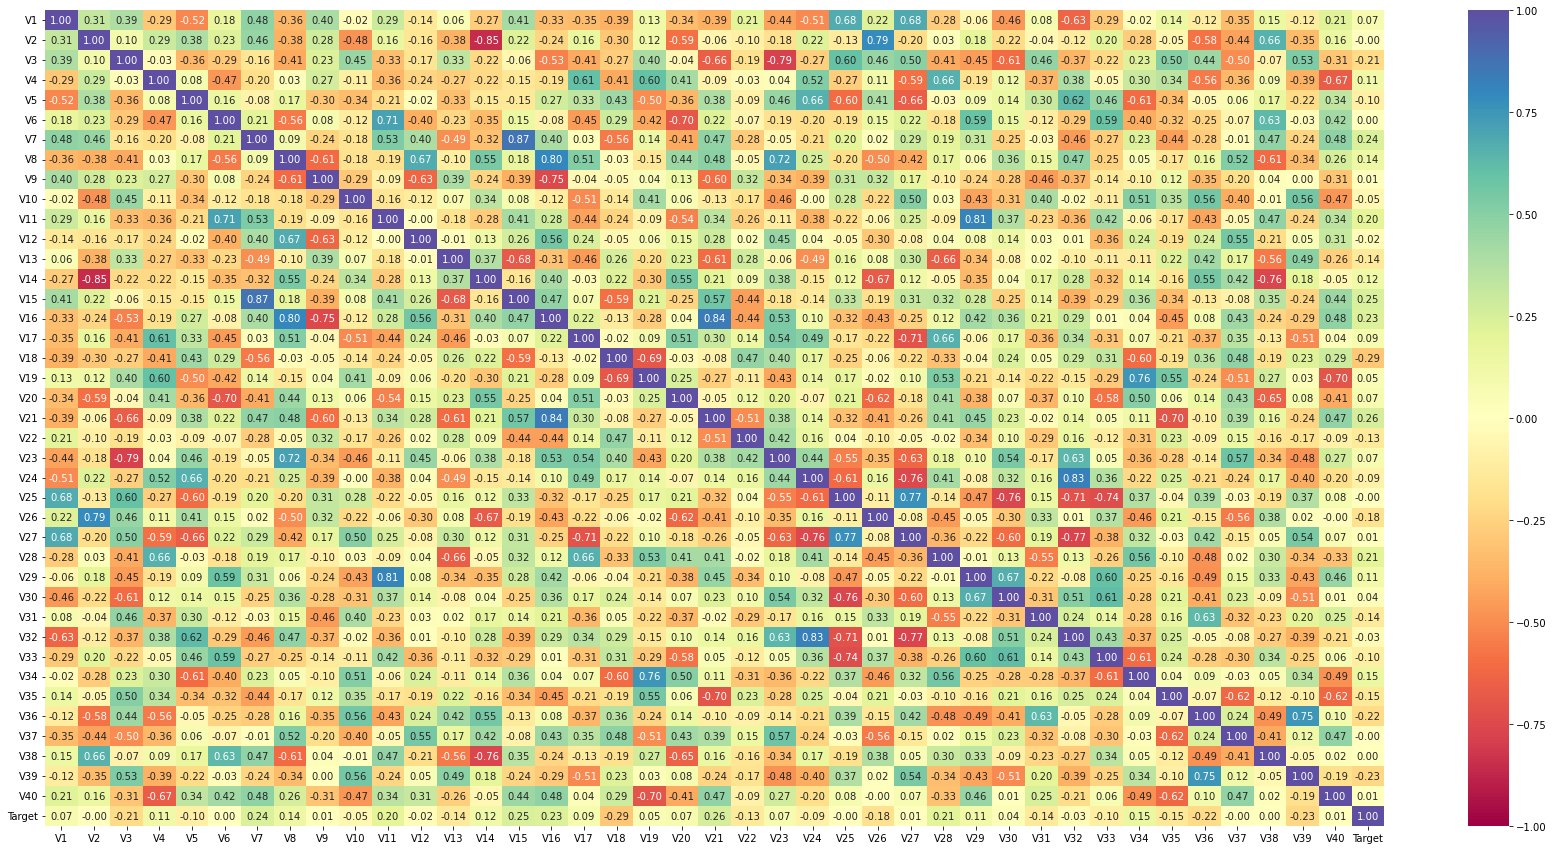

<IPython.core.display.Javascript object>

In [20]:
#plotting a correlation heat map
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 15))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
- From the correlation heat map, if we focus on the target variable, we will observe that the strongest correlations are observed in variables: V3, V7, V11, V15, V16, V18, V21, V28, V36 and V39
- We can also see correlations between variables V11 and V29, V2 and V14, V2 and  26 and some others
- We can explore the correlations for the target variable and other variables in some bivariate analyses

<AxesSubplot:xlabel='Target', ylabel='V3'>

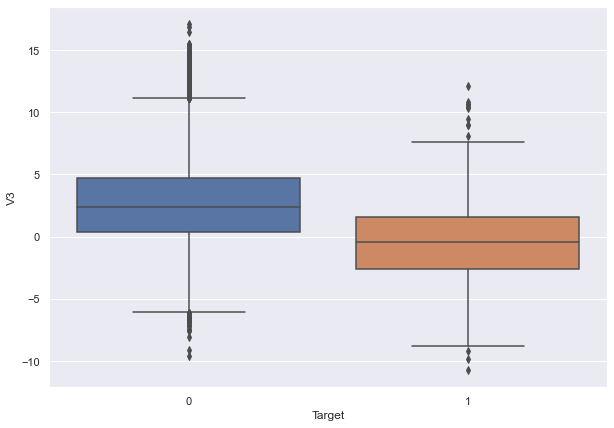

<IPython.core.display.Javascript object>

In [21]:
#Plotting a box plot for the variable V3 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V3", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with higher v3 values are likely to not fail.
- The 2nd and 3 quartile V3 of those likely to fail is lower than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V7'>

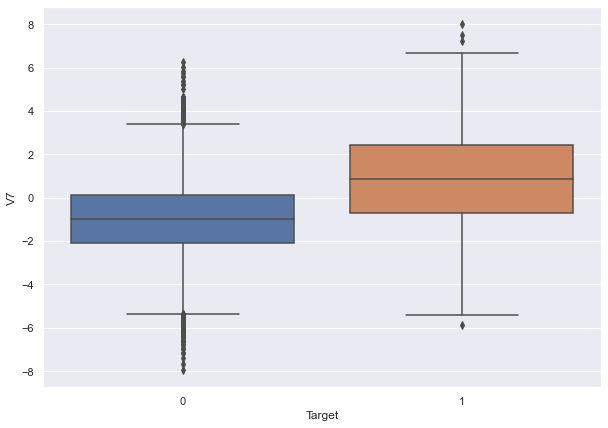

<IPython.core.display.Javascript object>

In [22]:
#Plotting a box plot for the variable V7 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V7", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with loweer v7 values are likely to not fail.
- The 2nd and 3 quartile V7 of those likely to fail is higher than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V11'>

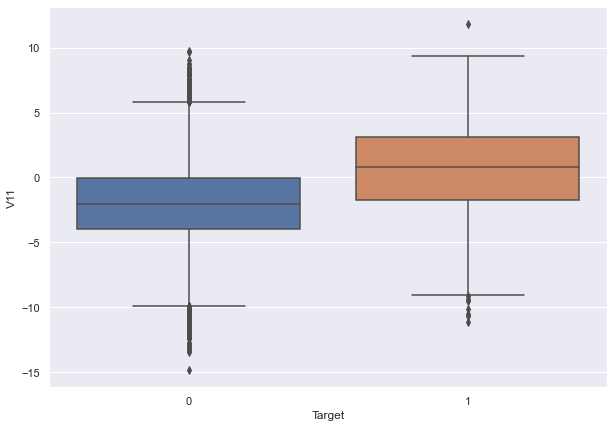

<IPython.core.display.Javascript object>

In [23]:
#Plotting a box plot for the variable V11 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V11", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower V11 values are likely to not fail.
- The 2nd and 3 quartile V11 of those likely to fail is higher than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V15'>

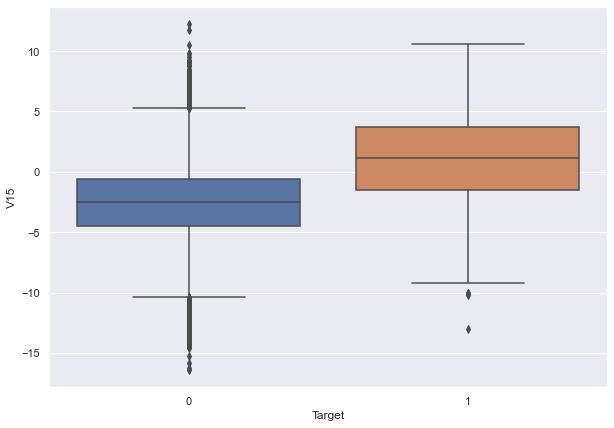

<IPython.core.display.Javascript object>

In [24]:
#Plotting a box plot for the variable V15 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V15", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower v15 values are less likely to fail.
- The 2nd and 3 quartile V15 of those likely to fail is higher than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V16'>

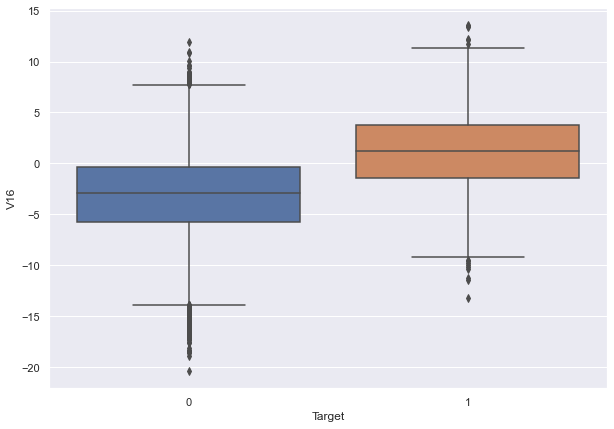

<IPython.core.display.Javascript object>

In [25]:
#Plotting a box plot for the variable V16 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V16", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower v16 values are less likely to fail.
- The 2nd and 3 quartile V16 of those likely to fail is higher than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V18'>

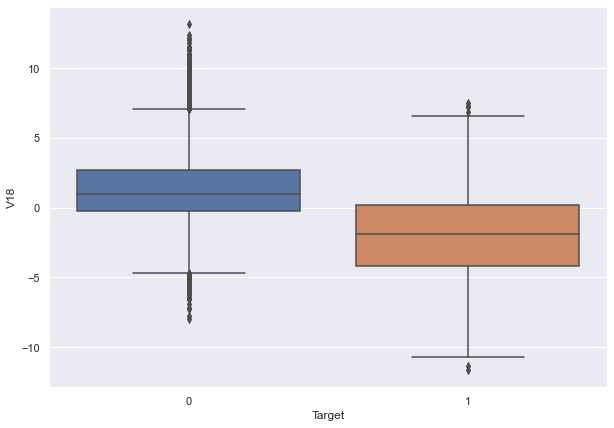

<IPython.core.display.Javascript object>

In [26]:
#Plotting a box plot for the variable V18 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V18", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower V18 values are more likely to fail.
- The 2nd and 3 quartile V18 of those likely to fail is lower than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V21'>

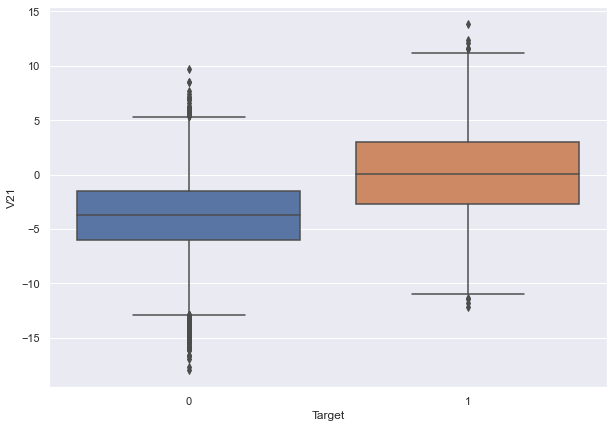

<IPython.core.display.Javascript object>

In [27]:
#Plotting a box plot for the variable V21 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V21",data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower v21 values are less likely to fail.
- The 2nd and 3 quartile V21 values of those likely to fail is higher than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V28'>

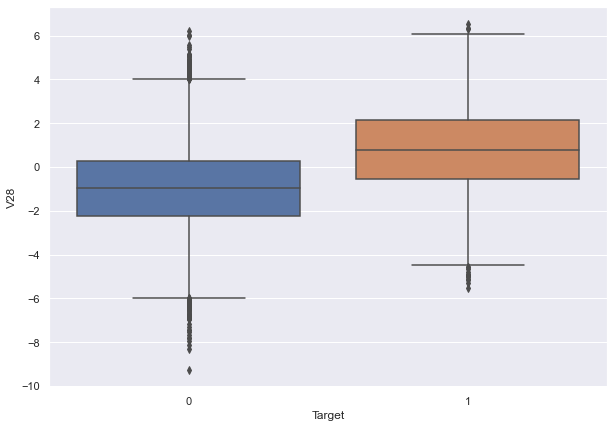

<IPython.core.display.Javascript object>

In [28]:
#Plotting a box plot for the variable V28 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V28", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower v28 values are less likely to fail.
- The 2nd and 3 quartile V28 values of those likely to fail is higher than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V36'>

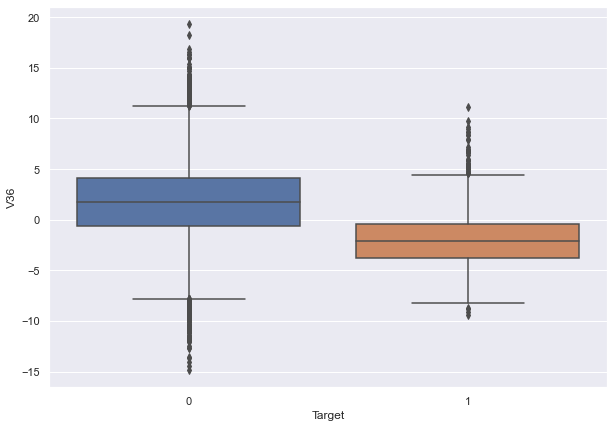

<IPython.core.display.Javascript object>

In [29]:
#Plotting a box plot for the variable V36 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V36", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with higher V36 values are less likely to fail.
- The 2nd and 3 quartile V36 values of those likely to fail is significantly Lower than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V39'>

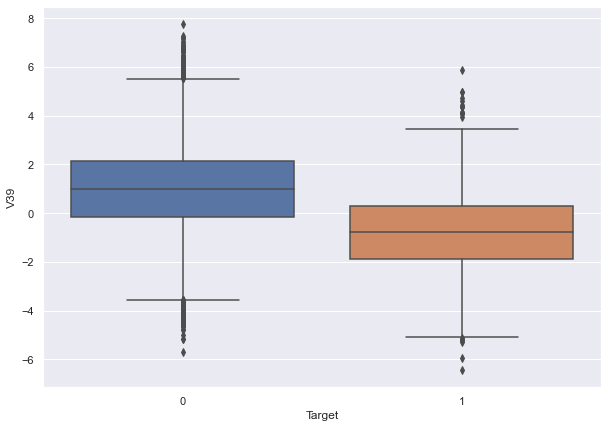

<IPython.core.display.Javascript object>

In [30]:
#Plotting a box plot for the variable V39 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V39", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower V36 values are more likely to fail.
- The 2nd and 3 quartile V36 values of those likely to fail is lower than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V10'>

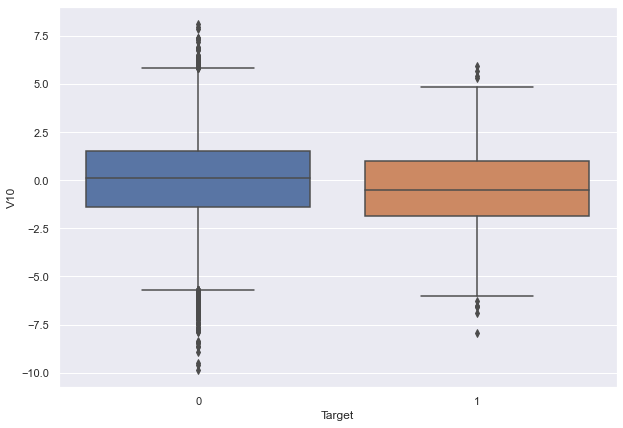

<IPython.core.display.Javascript object>

In [31]:
#Plotting a box plot for the variable V10 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V10", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower V10 values are slightly more likely to fail.
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V26'>

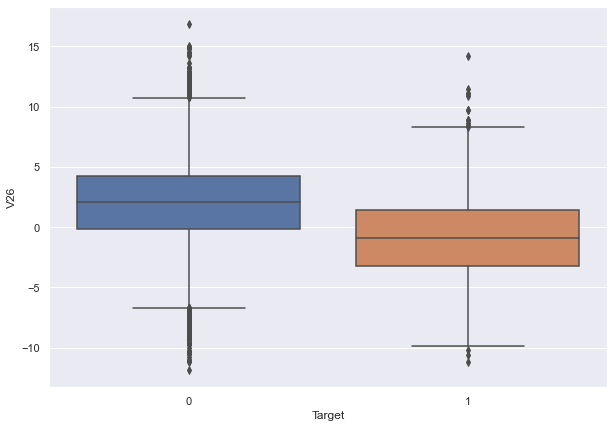

<IPython.core.display.Javascript object>

In [32]:
#Plotting a box plot for the variable V26 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V26", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with lower V26 values are more likely to fail.
- The 2nd and 3 quartile V26 values of those likely to fail is lower than those unlikely to fail
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V17'>

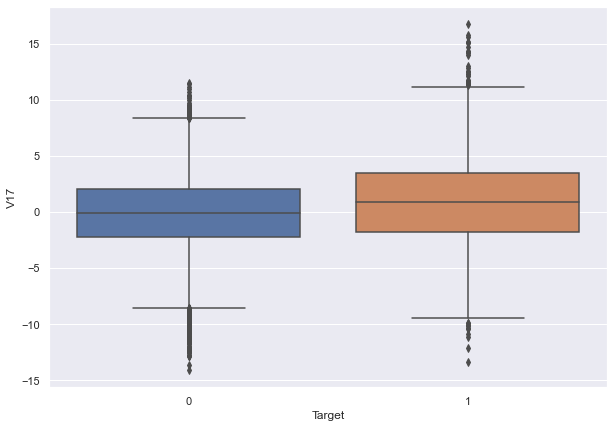

<IPython.core.display.Javascript object>

In [33]:
#Plotting a box plot for the variable V17 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V17", data=data, orient="vertical")

#### Observations:
- The box plot shows that wind turbine generators with higherr V17 values are slightly more likely to fail.
- We will see if this is an important feature in our model

<AxesSubplot:xlabel='Target', ylabel='V40'>

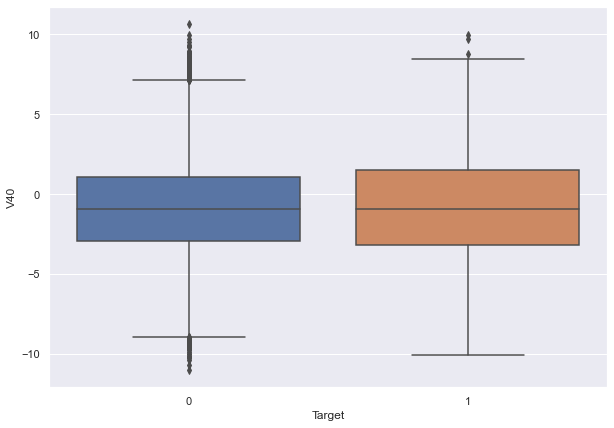

<IPython.core.display.Javascript object>

In [34]:
#Plotting a box plot for the variable V40 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V40", data=data, orient="vertical")

#### Observations:
- The box plot shows that the vakue of the v40 variable doesn't seem to affect failure of the wind turbine generators.
- We will see if this is an important feature in our model

#### Observations:
- We can observe that the value count target variables is very imbalanced.
- We will tackle this with oversamplong and undersampling

## Data Pre-processing

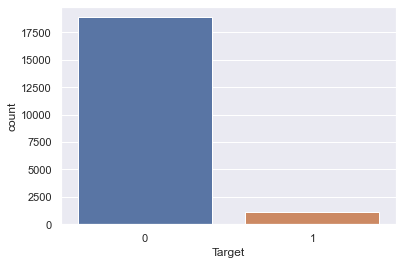

0    18890
1     1110
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
#Checking the distribution of the target in the training set and visualising it with a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data["Target"])
plt.show()
data["Target"].value_counts()

#### Observations
There are 18890 non failures and 1110 failures in the target variable of the training set

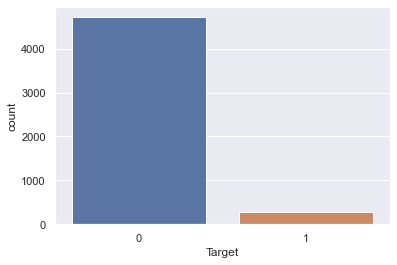

0    4718
1     282
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
#Checking the distribution of the target in the testing set and visualising it with a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data_test["Target"])
plt.show()
data_test["Target"].value_counts()

#### Observations
There are 4718 non failures and 282 failures

In [37]:
#defining the predictor and target variables in the training set
X = data.drop(["Target"], axis=1)
y = data["Target"]

<IPython.core.display.Javascript object>

In [38]:
# Splitting data into training and validation sets only since there is a different data set for testing data.

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)
print(X_train.shape, X_val.shape)

(15000, 40) (5000, 40)


<IPython.core.display.Javascript object>

In [39]:
# Checking the number of rows and columns in the X_train data
X_train.shape

(15000, 40)

<IPython.core.display.Javascript object>

In [40]:
# Checking the number of rows and columns in the X_val data
X_val.shape 

(5000, 40)

<IPython.core.display.Javascript object>

In [41]:
# Dividing test data into X_test and y_test

X_test = data_test.drop(["Target"], axis=1) 
y_test = data_test["Target"]

<IPython.core.display.Javascript object>

In [42]:
#Checking the number of rows and columns in the X_test data
X_test.shape 

(5000, 40)

<IPython.core.display.Javascript object>

## Missing value imputation




In [43]:
#Inputing the missing values in the 2 columns that have nulls with the median 
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["V1", "V2"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_median.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_median.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_median.transform(X_test[cols_to_impute])


<IPython.core.display.Javascript object>

In [44]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

<IPython.core.display.Javascript object>

#### Observation
All missing values have been imputed

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [46]:
#setting recall as the type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Defining function to be used to build confusion matrix

In [47]:
#defining a function for confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Model Building with original data

In [48]:
# Building models with the original data
#Creating a list to store all the models
models = []  

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.6982829521679532
Logistic regression: 0.4927566553639709
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.7956208065796118

Validation Performance:

dtree: 0.7050359712230215
Logistic regression: 0.48201438848920863
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8201438848920863


<IPython.core.display.Javascript object>

#### Observation
- Generally The performance on thevalidations set is slightly better than the training set for all the models
- The best 3 models using the original data are the Xgboost, Bagging and Random forest

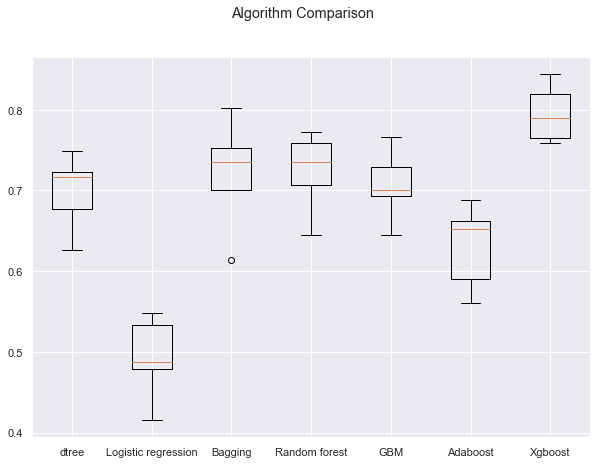

<IPython.core.display.Javascript object>

In [49]:
# Plotting boxplots for CV scores of Dtree model above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

#### Observations:
- Generally the XGBoost performs best on the original training data
- The GBM shows the least variance
- The models are not overfitting, however, the performance can be improved

### Model Building with Oversampled data


In [50]:
#Oversampling the data using SMOTE technique
#Checking the count of the target variables before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


#Checking the count of the target variables after oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

#Checking the shape of the predictor and target variables after oversampling
print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



<IPython.core.display.Javascript object>

In [51]:
#Model building and cross validation on the oversampled data
#Creating an empty list to store all the models
models = []  

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over) 
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
GBM: 0.9256068151319724
Adaboost: 0.8978689011775473
Xgboost: 0.989554053559209
dtree: 0.9720494245534969

Validation Performance:

Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439
dtree: 0.7769784172661871


<IPython.core.display.Javascript object>

#### Observations:
- We can observe slight overfitting in the models
- The model that shows the most overfitting is the decision tree model.
- The three models that perform best here are the GBM, Adaboost and XG boost models

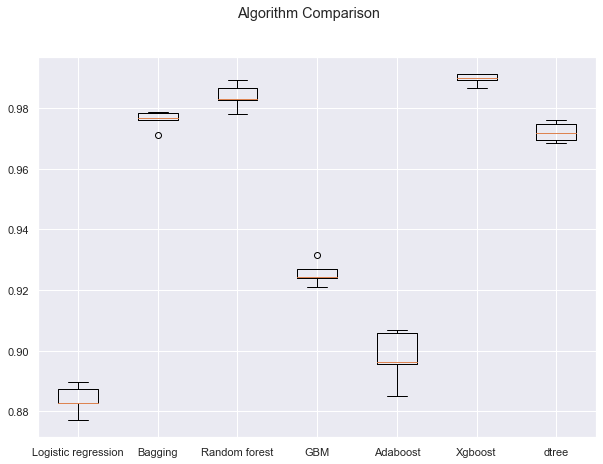

<IPython.core.display.Javascript object>

In [52]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

#### Observations: 
- From this boxplot we can see that the XGBoost model performed best on the training set closely followed by the random forest model.
- XGboost shows the least variance
- The logistics regression performed the poorest on the training set

### Model Building with Undersampled data

In [53]:
#Undersampling the data using Random undersampling techniques
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


#Checking the count of the target variables before undersampling
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


#Checking the count of the target variables after undersampling
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

#Checking the shape of the predictor and target variables after undersampling
print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



<IPython.core.display.Javascript object>

In [54]:
#Model building and cross validation on the undersampled data
#fitting the models and checking their performances
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on undersampled data
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)  
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8990621167303946
Adaboost: 0.8666113556020489
Xgboost: 0.9074742082100858
dtree: 0.8617776495202367

Validation Performance:

Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.9028776978417267
dtree: 0.841726618705036


<IPython.core.display.Javascript object>

#### Observations:
- From this boxplot we can see that the XGBoost model is the  best on both the training and validation set in terms of performance and stability 
- The Adaboost and dtree models performed poorest in terms of the recall score on the validation set.
- Other models such as the Random forest, Bagging, GBM also performed okay

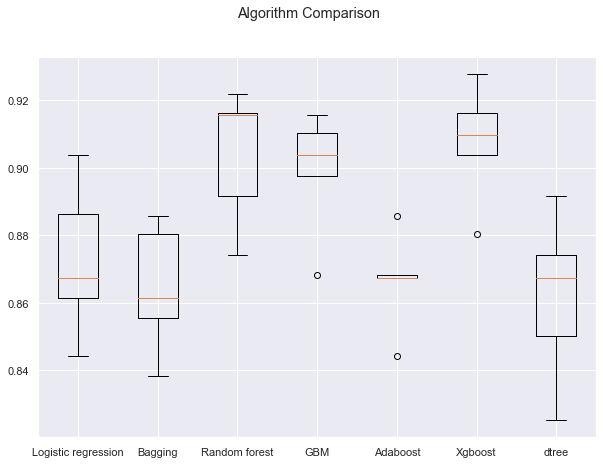

<IPython.core.display.Javascript object>

In [55]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

Observations:
- The XGBoost has the best performance in the training set after undersampling
- The dtree model has the lowest recall score on the training set. 
- Adaboost shows the least variance.

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [56]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5684366207344347:


<IPython.core.display.Javascript object>

In [57]:
# Creating new pipeline with best parameters
tuned_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=1,
    min_impurity_decrease= 0.0001,
    max_leaf_nodes=15,
    min_samples_leaf=7,
)
## fitting the model on original data
tuned_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [58]:
#Checking the performance on the training data
dt_train_perf = model_performance_classification_sklearn(tuned_dt, X_train, y_train)
dt_train_perf

,Accuracy,Recall,Precision,F1
0,0.974,0.591,0.904,0.715


<IPython.core.display.Javascript object>

In [59]:
#Checking the performance on the validation set 
dt_val_perf = model_performance_classification_sklearn(tuned_dt, X_val, y_val) 
dt_val_perf

,Accuracy,Recall,Precision,F1
0,0.970,0.583,0.822,0.682


<IPython.core.display.Javascript object>

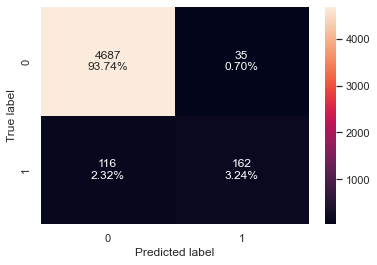

<IPython.core.display.Javascript object>

In [60]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_dt, X_val, y_val)

#### Observations:
- This model has a good accuracy and precision score but a very poor recall score and F1 score in terms of performance. 
- We definitely need to try other models to see which ones will be better
- The model is only able to successfully predict 162 true failures

### Sample tuning method for Decision tree with oversampled and undersampled data

In [61]:
#creating decision tree for oversampled data
#defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


<IPython.core.display.Javascript object>

In [62]:
# Creating new pipeline with best parameters
tuned_dt1 = DecisionTreeClassifier(
    max_depth=3,
    random_state=1,
    min_impurity_decrease= 0.001,
    max_leaf_nodes=15,
    min_samples_leaf=7,
)
## fitting the model on over sampled data
tuned_dt1.fit(X_train_over,y_train_over) 

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [63]:
#Checking the performance on the training set
dt2_train_perf = model_performance_classification_sklearn(tuned_dt1, X_train_over, y_train_over)
dt2_train_perf

,Accuracy,Recall,Precision,F1
0,0.843,0.917,0.799,0.854


<IPython.core.display.Javascript object>

In [64]:
#Checking the performance on the validation set
dt2_val_perf2 = model_performance_classification_sklearn(tuned_dt1, X_val, y_val)
dt2_val_perf2

,Accuracy,Recall,Precision,F1
0,0.763,0.885,0.176,0.294


<IPython.core.display.Javascript object>

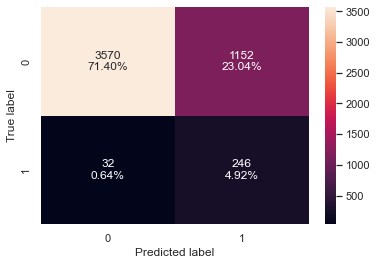

<IPython.core.display.Javascript object>

In [65]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_dt1, X_val, y_val)

#### Observations:
- The recall score here is much better in terms of performance and stability than the original data, though we can see a lot of overfitting in the precision score. 
- The F1 score is also very poor
- If the company is looking to focus on recall only, then this is not a bad model
- From the confusion matrix, we can see that it is able to predict 246 true failures

In [66]:
# Sample tuning method for Decision tree with undersampled data
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:


<IPython.core.display.Javascript object>

In [67]:
# Creating new pipeline with best parameters
tuned_dt2 = DecisionTreeClassifier(
    max_depth=2,
    random_state=1,
    min_impurity_decrease= 0.001,
    max_leaf_nodes=5,
    min_samples_leaf=1,
)
#fitting the model on under sampled data
tuned_dt2.fit(X_train_un,y_train_un)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

In [68]:
#Checking the performance on the training set
dt3_train_perf = model_performance_classification_sklearn(tuned_dt2, X_train_un, y_train_un)
dt3_train_perf

,Accuracy,Recall,Precision,F1
0,0.764,0.909,0.705,0.794


<IPython.core.display.Javascript object>

In [69]:
#Checking the perfromance on the validation set
dt3_val_perf = model_performance_classification_sklearn(tuned_dt2, X_val, y_val)
dt3_val_perf

,Accuracy,Recall,Precision,F1
0,0.609,0.888,0.114,0.202


<IPython.core.display.Javascript object>

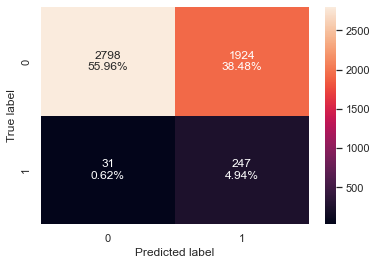

<IPython.core.display.Javascript object>

In [70]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_dt2, X_val, y_val)

#### Observations
- In this model, we have a good recall score in terms of stability and performance.
- as it was in the oversampled decision tree model, we can see a lot of overfitting in the precision  of the training set.
- The model is able to predict 247 failures (True positives) accurately 
- Since the company is only interested in recall, this is a good model. 

### Tuning Adaboost with Oversampled and undersampled data

In [71]:
%%time
#Tuned Ada boost with Oversampled data

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9715559462639259:
CPU times: user 1min 5s, sys: 184 ms, total: 1min 5s
Wall time: 10min 23s


<IPython.core.display.Javascript object>

In [72]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators= 200, learning_rate=0.2, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) 

#Fitting the model on oversampled data
tuned_ada.fit(X_train_over,y_train_over) 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

<IPython.core.display.Javascript object>

In [73]:
#Checking the performance on the training set
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.992,0.988,0.995,0.992


<IPython.core.display.Javascript object>

In [74]:
#Checking the performance on the validation set
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val) 
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.979,0.853,0.790,0.820


<IPython.core.display.Javascript object>

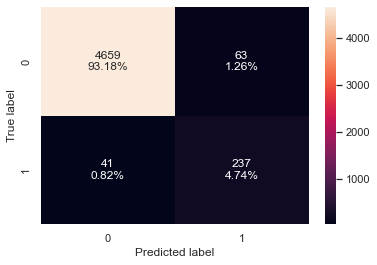

<IPython.core.display.Javascript object>

In [75]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_ada, X_val, y_val)

#### Observations:
- The adaboost tuned with oversampling data has a good performance
- we can observe little overrfitting in the precision and recall scores
- The model is able to accurately predict 237 failures correctly (True positives)

In [76]:
%%time 
#Adaboost with undersampled data

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) 
#fitting the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8906283817906356:
CPU times: user 2.36 s, sys: 49.5 ms, total: 2.41 s
Wall time: 28.5 s


<IPython.core.display.Javascript object>

In [77]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier(
    n_estimators= 200, learning_rate=0.05, base_estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
) 
#fitting the model on undersampled data
tuned_ada2.fit(X_train_un,y_train_un) 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=200)

<IPython.core.display.Javascript object>

In [78]:
#Checking the performance on the training set
ada_train_perf2 = model_performance_classification_sklearn(tuned_ada2, X_train_un, y_train_un)
ada_train_perf2

,Accuracy,Recall,Precision,F1
0,0.950,0.916,0.982,0.948


<IPython.core.display.Javascript object>

In [79]:
#Checking the performance on the validation set
ada_val_perf2 = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)
ada_val_perf2

,Accuracy,Recall,Precision,F1
0,0.928,0.878,0.427,0.574


<IPython.core.display.Javascript object>

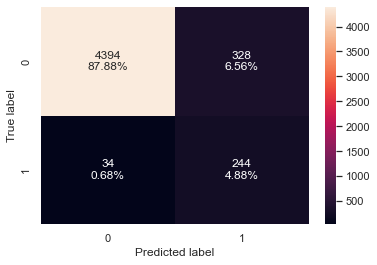

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_ada2, X_val, y_val)

#### Observations:
- The adaboost tuned with undersampling data has a good performance in terms of recall score and stability
- we can observe overfitting in the precision and F1 scores
- The model is able to accurately predict 244 true failures
- Overall, it is a good model if only recall is to be considered

### Tuning Random forest using Oversampled and undersampled data

In [81]:
%%time 
#Tuning with the oversampled data
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": ['sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9818606498020482:
CPU times: user 15.6 s, sys: 117 ms, total: 15.8 s
Wall time: 7min 27s


<IPython.core.display.Javascript object>

In [82]:
# Creating new pipeline with best parameters
tuned_rf1 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples= 0.6,
    n_estimators=200,
    min_samples_leaf=1,
)

tuned_rf1.fit(X_train_over,y_train_over) 

RandomForestClassifier(max_samples=0.6, n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [83]:
#Checking the performance on the training test
tunedrf1_train_perf = model_performance_classification_sklearn(tuned_rf1, X_train_over, y_train_over)
tunedrf1_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [84]:
#Checking the performance on the validation test
tunedrf1_val_perf = model_performance_classification_sklearn(tuned_rf1, X_val, y_val)
tunedrf1_val_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.863,0.920,0.891


<IPython.core.display.Javascript object>

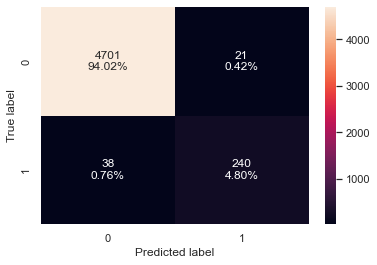

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_rf1, X_val, y_val)

#### Observations:
- The Rf tuned with oversampling data has a good performance
- we can observe little overfitting in the recall scores
- The model is able to accurately predict 240 true failures
- it's a good model generally and can also serve well if the company considers precision as a metric in future

In [86]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": ['sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8990188298102592:
CPU times: user 1.05 s, sys: 57.3 ms, total: 1.11 s
Wall time: 18.4 s


<IPython.core.display.Javascript object>

In [87]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples= 0.5,
    n_estimators=250,
    min_samples_leaf=1,
)
## fitting the model on under sampled data
tuned_rf2.fit(X_train_un,y_train_un) 

RandomForestClassifier(max_samples=0.5, n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

In [88]:
#Checking the performance on the training set
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train_un, y_train_un)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.978,0.958,0.999,0.978


<IPython.core.display.Javascript object>

In [89]:
#Checking the performance on the validation set
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)## Complete the code to check the performance on validation set
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.939,0.885,0.475,0.618


<IPython.core.display.Javascript object>

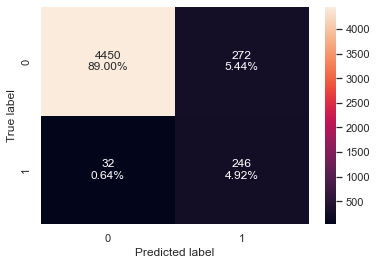

<IPython.core.display.Javascript object>

In [90]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_rf2, X_val, y_val)

#### Observations:
- The rf tuned with undersampling data has a good performance in terms of recall
- It has a very poor precision score and F1 score on the validation set
- The model is able to accurately predict 246 true failures

### Tuning Gradient Boosting using oversampled and undersampled data

In [91]:
%%time 
#Gradent boosting using oversampled data
# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9726851919894598:
CPU times: user 13.7 s, sys: 94.7 ms, total: 13.8 s
Wall time: 4min 34s


<IPython.core.display.Javascript object>

In [92]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7,
)
#fitting the model on over sampled data
tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [93]:
#Checking the performance on the training set
gbm_train_perf = model_performance_classification_sklearn(tuned_gbm, X_train_over, y_train_over)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.993,0.992,0.994,0.993


<IPython.core.display.Javascript object>

In [94]:
#Checking the performance on the validation set
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.969,0.856,0.678,0.757


<IPython.core.display.Javascript object>

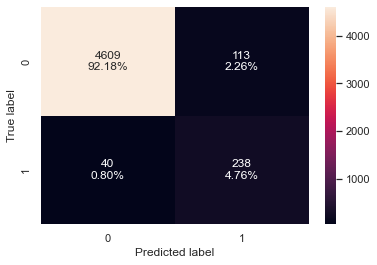

<IPython.core.display.Javascript object>

In [95]:
#creating confusion matrix
confusion_matrix_sklearn(tuned_gbm, X_val, y_val)

#### Observations:
- The GBM tuned with oversampling data has a good performance in terms of recall, with a score of 0.856 on the validation set
- we can observe some overfitting in the precision and F1 scores
- The model is able to accurately predict 238 true failures
- It's a good model if we're only interested in recall, though it is not the best model we've seen so far

In [96]:
%%time 
#Gradent boosting using undersampled data
# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9038236779453142:
CPU times: user 936 ms, sys: 48.4 ms, total: 985 ms
Wall time: 12.6 s


<IPython.core.display.Javascript object>

In [97]:
#Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=0.2,
    n_estimators=125,
    subsample=0.5,
)
## fitting the model on under sampled data
tuned_gbm2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.5)

<IPython.core.display.Javascript object>

In [98]:
#Checking the performance on the training set
gbm_train_perf2 = model_performance_classification_sklearn(tuned_gbm2, X_train_un, y_train_un) 
gbm_train_perf2

,Accuracy,Recall,Precision,F1
0,0.995,0.992,0.998,0.995


<IPython.core.display.Javascript object>

In [99]:
#Checking the performance on the validation set
gbm_val_perf2 = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm_val_perf2

,Accuracy,Recall,Precision,F1
0,0.919,0.871,0.395,0.544


<IPython.core.display.Javascript object>

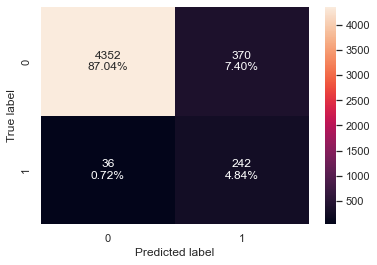

<IPython.core.display.Javascript object>

In [100]:
#creating confusion matrix
confusion_matrix_sklearn(tuned_gbm2, X_val, y_val)

#### Observations:
- The GBM tuned with undersampling data has a good performance in terms of recall with a score of 0.871 on the validation set
- we can observe overfitting in the precision and F1 scores
- The model is able to accurately predict 242 true failures
- It's a good model since we are only interest in the recall

### Tuning XGBoost using oversampled and undersampled data

In [101]:
%%time 
#Tuning XGboost using oversampled data
#defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.995765154155294:
CPU times: user 1min 26s, sys: 4.11 s, total: 1min 30s
Wall time: 32min 55s


<IPython.core.display.Javascript object>

In [102]:
#Creating new pipeline with best parameters
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)
## fitting the model on over sampled data
xgb2.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [103]:
#Checking the performance on the training set
xgb2_train_perf =  model_performance_classification_sklearn(xgb2, X_train_over, y_train_over)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [104]:
#Checking the performance on the validation set
xgb2_val_perf =  model_performance_classification_sklearn(xgb2, X_val, y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.878,0.878,0.878


<IPython.core.display.Javascript object>

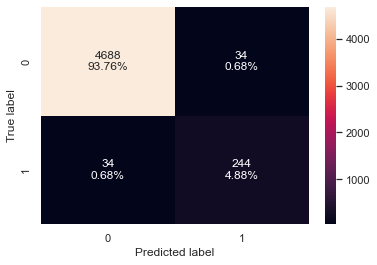

<IPython.core.display.Javascript object>

In [105]:
#creating confusion matrix
confusion_matrix_sklearn(xgb2, X_val, y_val)

#### Observations:
- The XGBoost tuned with oversampling data has a good performance with a recall of 0.878 on the validation set
- we can observe that the precision, accuracy anf F1 scores are also good
- The model is able to accurately predict 244 true failures

In [106]:
%%time 
#Tuning XGboost using undersampled data
#defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.9266575283168603:
CPU times: user 6.46 s, sys: 460 ms, total: 6.92 s
Wall time: 1min 44s


<IPython.core.display.Javascript object>

In [107]:
# Creating new pipeline with best parameters
xgb3 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.2,
    gamma=3,
)
## fitting the model on under sampled data
xgb3.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [108]:
#Checking the performance on the training set
xgb3_train_perf =  model_performance_classification_sklearn(xgb3, X_train_un, y_train_un)
xgb3_train_perf

,Accuracy,Recall,Precision,F1
0,0.998,1.000,0.996,0.998


<IPython.core.display.Javascript object>

In [109]:
#Checking the performance on the validation set
xgb3_val_perf =  model_performance_classification_sklearn(xgb3, X_val, y_val)
xgb3_val_perf

,Accuracy,Recall,Precision,F1
0,0.879,0.906,0.303,0.454


<IPython.core.display.Javascript object>

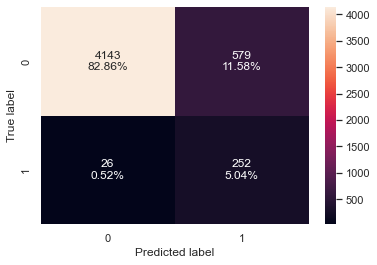

<IPython.core.display.Javascript object>

In [110]:
#creating confusion matrix
confusion_matrix_sklearn(xgb3, X_val, y_val)

#### Observations:
- The XGboost tuned with undersampling data has the best recall performance in terms of score and stability.
- it has a poor precision and F1 score
- The model is able to accurately predict 252 true failures (True positives) and it has the lowest number of False negatives so far.

## Model performance comparison and choosing the final model

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dt2_train_perf.T,
        dt3_train_perf.T,
        gbm_train_perf.T,
        gbm_train_perf2.T,
        ada_train_perf.T,
        ada_train_perf2.T,
        tunedrf1_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
        xgb3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
     "Decision tree tuned with oversampled data",
    "Decision tree tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data",
    "Gradient Boosting tuned with undersampled data",
    "AdaBoost classifier tuned with oversampled data",
    "AdaBoost classifier tuned with undersampled data",
    "Random forest tuned with oversampled data",
     "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
    "XGBoost tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision tree tuned with oversampled data,Decision tree tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data,AdaBoost classifier tuned with oversampled data,AdaBoost classifier tuned with undersampled data,Random forest tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data,XGBoost tuned with undersampled data
Accuracy,0.843,0.764,0.993,0.995,0.992,0.950,1.000,0.978,1.000,0.998
Recall,0.917,0.909,0.992,0.992,0.988,0.916,0.999,0.958,1.000,1.000
Precision,0.799,0.705,0.994,0.998,0.995,0.982,1.000,0.999,1.000,0.996
F1,0.854,0.794,0.993,0.995,0.992,0.948,1.000,0.978,1.000,0.998


<IPython.core.display.Javascript object>

In [112]:
# validation performance comparison

models_val_comp_df = pd.concat(
     [
        dt2_val_perf2.T,
        dt3_val_perf.T,
         gbm_val_perf.T,
        gbm_val_perf2.T,
        ada_val_perf.T,
        ada_val_perf2.T,
        tunedrf1_val_perf.T,
        rf2_val_perf.T,
        xgb2_val_perf.T,
        xgb3_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
     "Decision tree tuned with oversampled data",
    "Decision tree tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data",
    "Gradient Boosting tuned with undersampled data",
    "AdaBoost classifier tuned with oversampled data",
    "AdaBoost classifier tuned with undersampled data",
    "Random forest tuned with oversampled data",
     "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
    "XGBoost tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision tree tuned with oversampled data,Decision tree tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data,AdaBoost classifier tuned with oversampled data,AdaBoost classifier tuned with undersampled data,Random forest tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data,XGBoost tuned with undersampled data
Accuracy,0.763,0.609,0.969,0.919,0.979,0.928,0.988,0.939,0.986,0.879
Recall,0.885,0.888,0.856,0.871,0.853,0.878,0.863,0.885,0.878,0.906
Precision,0.176,0.114,0.678,0.395,0.790,0.427,0.920,0.475,0.878,0.303
F1,0.294,0.202,0.757,0.544,0.820,0.574,0.891,0.618,0.878,0.454


<IPython.core.display.Javascript object>

#### Observations:
- The XGboost tuned with undersampled data has the best performance on the validation set with a recall score of 0.906. 
- Earlier, from the confusion matrix, we could see that the xgboost undersampled predicted the highest number of true positives ndhad the lowest number of false negatives.
- The best models overall after the xgboost tuned undersampling model are Decision tree with undersampled data, decision tree with oversampled data and tuned random forest with undersampled data.
- If in the future, the company decides to include both precision and recall as metrics, the oversampled adaboost, oversampled rf1 and oversampled xgb will also be good models to opt for.

### Feature Importances

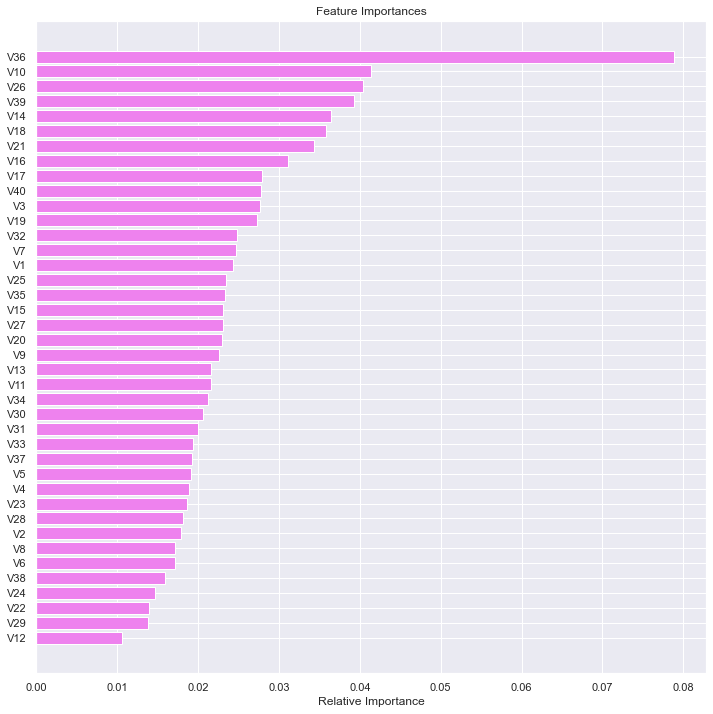

<IPython.core.display.Javascript object>

In [113]:
#Checking the important features
feature_names = X_train.columns
importances =  xgb3.feature_importances_ 
indices = np.argsort(importances)

#creating the plot
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
- The most important feature in this model is V36
- Other important features are V10,V26,V39,V14,V18,V21,V16,V17 and V40
- the features with the least importance are V12, V29, V22, V24 and V38

### Test set final performance

## Pipelines to build the final model


In [114]:
#Building a pipeline model with the best model
Pipeline_model = Pipeline(
    steps=[
        (
            "xgb3",
            XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.2,
    gamma=3,
                ),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [115]:
#Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

#I would not be dividing the data into train and test since we have the test data as a separate document
#dropping the target column in the xtest
X_test1 = df_test.drop(columns="Target")
#Storing the target variable in the y test
y_test1 = df_test["Target"]



<IPython.core.display.Javascript object>

In [116]:
#treating the missing values by filling with the median
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)


<IPython.core.display.Javascript object>

In [117]:
#undersampling on the data using random undersampling technique
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un,  y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [118]:
#Fitting the pipeline model 
Pipeline_model.fit (X_train_un,y_train_un)

Pipeline(steps=[('xgb3',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               gamma=3, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=250, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...))])

<IPython.core.display.Javascript object>

In [119]:
#Checking the performance of the pipeline on the testing data
Pipeline_model_test = model_performance_classification_sklearn(Pipeline_model, X_test1,y_test1)
Pipeline_model_test

,Accuracy,Recall,Precision,F1
0,0.874,0.887,0.294,0.442


<IPython.core.display.Javascript object>

#### Observations:
 - We can observe a recall score of 0.887 on the testing data
 - The undersampled tuned XGBoost model generalizes well on the testing data.

# Business Insights and Conclusions


- The XGboost tuned with undersampled data had the best performance on the validation set and also showed a very good performance on the testing data, with a recall score of 0.887 on the testing data.

- Though the model did not have a great precision and F1 score, it had the highest recall score and recall is the metric of utmost importance in this case.( We could also see from the confusion matrix during training, that this model predicted the highest number of True positives and lowest number of False negatives in all our models) Thus, this model will be most useful in saving maintenance cost.

- In addition, a pipeline has been built to productionalize the final model that was chosen.

- If anything changes in the future, and the company decides to proritize both precision and recall as metrics, the oversampled adaboost, oversampled rf1 and oversampled xgb will be good models to opt for.

- The top 10 features in our best performing model in order of importance are V36,V10,V26,V39,V14,V18,V21,V16,V17 and V40 while features like V12, V29, V22, V24 and V38 do not seem to be important features.

- looking at the EDA,we can see that higher values in variables like V14,V21,V16 and V17 indicates that the generators are likely to fail when these values are high. On the other hand, when values of variables V36,V10,V26,V39,V18 are low, they are more likely to fail as well. These variables will need to be monitored to save the maintenance cost.

- From the EDA, the Variable V40 showed no significant difference in values for either failure or non failure, but the variance in the failure range is slightly wider than none failures. We can see that it is however an important feature in this model, so it will be good to do routine checks on it and possibly collect more data to try and observe a pattern in the future which may give more information concerning this variable.

- I will suggest that Renewind finds a way to possibly use a timer on their sensors so that we can do further analysis to determine how much time usually passes before a sensor's value goes from the safe zone into the red zone. This may help us to further improve on the model and further save maintenance cost.

- I will also suggest that there can be an alarm system, warning message or something similar, that can be attached to the sensors of utmost importance so that the signal can be triggered once the values are in or nearing the failing zone.

***